In [25]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#files to load
country_gdp_load = "../Data_Sets/DP_LIVE_17012020203803051.csv"
country_gdp = pd.read_csv(country_gdp_load)

country_gdp

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,ARG,GDP,TOT,USD_CAP,A,2006,15460.414120,NaN
1,ARG,GDP,TOT,USD_CAP,A,2007,17136.460230,NaN
2,ARG,GDP,TOT,USD_CAP,A,2008,18000.203150,NaN
3,ARG,GDP,TOT,USD_CAP,A,2009,16898.991720,NaN
4,ARG,GDP,TOT,USD_CAP,A,2010,18524.856760,NaN
...,...,...,...,...,...,...,...,...
211,ZMB,GDP,TOT,USD_CAP,A,2012,3576.373281,NaN
212,ZMB,GDP,TOT,USD_CAP,A,2013,3701.581648,NaN
213,ZMB,GDP,TOT,USD_CAP,A,2014,3826.164471,NaN
214,ZMB,GDP,TOT,USD_CAP,A,2015,3862.128452,NaN


In [26]:
#PIVOT!
country_gdp2 = country_gdp.pivot_table(values ="Value", index ="LOCATION", columns ="TIME")
country_gdp2

#rename
country_gdp2=country_gdp2.rename(index = {'ARG':'Argentina',
                                     'AUS':'Australia',
                                     'BGR':'Bulgaria',
                                     'CHN':'China (Mainland)',
                                     'COL':'Colombia',
                                     'FRA':'France',
                                     'DEU':'Germany, Fed. Republic',
                                     'GRC':'Greece',
                                     'IND':'India',
                                     'IDN':'Indonesia',
                                     'ITA':'Italy',
                                     'JPN':'Japan',
                                     'MEX':'Mexico',
                                     'PER':'Peru',
                                     'POL':'Poland',
                                     'SAU':'Saudi Arabia',
                                     'TUR':'Turkey',
                                     'GBR':'United Kingdom',
                                     'USA':'United States',
                                     'ZMB':'Zambia'})

In [27]:
#find mean

for column in country_gdp2:
    total = country_gdp2.sum(axis = 1, skipna = True)
    mean = total*100/10
    
loc_mean = pd.DataFrame({"Mean GDP":mean})
loc_mean = loc_mean.sort_values(by=['Mean GDP'])
loc_mean = loc_mean.reset_index()    
loc_mean

,LOCATION,Mean GDP
0,Zambia,3.619128e+05
1,India,5.336238e+05
2,Peru,8.146263e+05
3,Indonesia,1.027037e+06
4,China (Mainland),1.151522e+06
5,Colombia,1.274618e+06
6,Bulgaria,1.708613e+06
7,Mexico,1.799690e+06
8,Argentina,2.066588e+06
9,Turkey,2.150858e+06


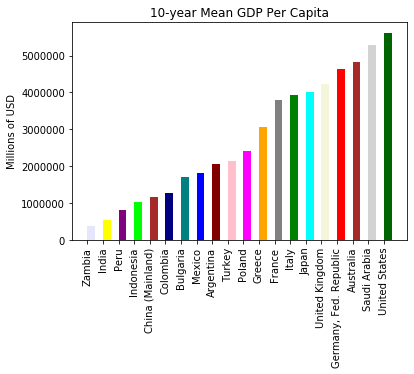

In [28]:
#ploterate

plt.bar(loc_mean['LOCATION'],loc_mean['Mean GDP'], align='edge', width = .5, color=['lavender','yellow','purple','lime','brown','navy','teal','blue','maroon','pink','magenta','orange','grey','green','cyan','beige','red','brown','lightgrey','darkgreen'])
plt.title("10-year Mean GDP Per Capita")        
plt.xticks(rotation=90)
plt.ylabel("Millions of USD")
plt.show
plt.savefig("../Graph_Images/GDP Graphs/Country PerCap GDP Bar",bbox_inches="tight")

In [29]:
#PIIIVVVOOOTTTT
country_gdp = country_gdp.pivot_table(values ="Value", index ="TIME", columns ="LOCATION")
country_gdp

#rename
country_gdp=country_gdp.rename(columns = {'ARG':'Argentina',
                                     'AUS':'Australia',
                                     'BGR':'Bulgaria',
                                     'CHN':'China (Mainland)',
                                     'COL':'Colombia',
                                     'FRA':'France',
                                     'DEU':'Germany, Fed. Republic',
                                     'GRC':'Greece',
                                     'IND':'India',
                                     'IDN':'Indonesia',
                                     'ITA':'Italy',
                                     'JPN':'Japan',
                                     'MEX':'Mexico',
                                     'PER':'Peru',
                                     'POL':'Poland',
                                     'SAU':'Saudi Arabia',
                                     'TUR':'Turkey',
                                     'GBR':'United Kingdom',
                                     'USA':'United States',
                                     'ZMB':'Zambia'})

country_gdp


LOCATION,Argentina,Australia,Bulgaria,China (Mainland),Colombia,"Germany, Fed. Republic",France,United Kingdom,Greece,Indonesia,India,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United States,Zambia
TIME,,,,,,,,,,,,,,,,,,,,
2006,15460.41412,37844.78209,11249.36626,5852.349553,8993.624772,34624.96888,NaN,34772.47846,28514.62940,7300.866433,3362.269982,32256.66822,33094.33769,13720.68823,NaN,15143.17634,41791.16649,13513.39443,46230.84620,2393.216756
2007,17136.46023,39597.74312,12606.95651,6829.424541,9750.675936,36820.15324,34092.91957,35599.40067,29289.73554,7853.303708,3696.164165,33903.20805,34507.17007,14233.02948,8098.434185,16788.67016,42539.46976,14726.31117,47902.06035,2589.986172
2008,18000.20315,40094.83321,14089.68769,7595.734210,10143.055260,38432.44821,35102.87043,36650.10126,30855.93577,8360.442284,3841.684247,35274.31272,34803.65781,14885.90244,8907.759314,18315.04564,44854.82318,15910.70013,48311.22370,2768.860353
2009,16898.99172,41615.32666,13925.02386,8332.410641,10222.230230,37501.12756,34719.50499,35038.59208,30388.35209,8508.180961,4104.009090,34355.46446,33201.98695,14532.38652,8972.800803,19095.05457,43069.44540,15347.18579,47028.16040,2961.483104
2010,18524.85676,42787.35854,14598.58550,9281.496213,10665.091780,39703.55809,35936.04187,36371.61827,28169.37708,8399.655991,4420.893038,34857.26656,34994.37223,15257.67356,9723.603632,20804.75361,44491.84513,17244.58697,48395.80347,3212.447852
2011,19817.45048,44419.30975,15661.19215,10330.747360,11553.671900,42541.51313,37447.94954,37146.17327,26141.09103,8973.562971,4739.373347,36183.31603,35775.25633,16546.64141,10435.871320,22576.17938,48524.63974,19445.13323,49810.69951,3361.606878
2012,19764.22501,43879.18036,16241.60731,11300.296500,12093.745540,43359.54105,37684.19807,38309.02831,25284.40578,9561.447727,5031.957154,36002.90870,37213.83740,17220.06914,11162.353490,23542.00296,50611.03068,20473.43870,51540.96832,3576.373281
2013,20365.61335,47761.21406,16581.78042,12331.055890,12720.714200,44993.66784,39528.47364,39984.88504,26097.79752,10129.881430,5377.580201,36067.70734,39008.36056,17461.79827,11891.632510,24422.76391,51373.65750,22204.86535,53045.94512,3701.581648
2014,20008.32064,47638.63344,17555.51587,13411.504000,13420.231050,47011.28040,40144.05949,41269.35163,26838.58227,10694.447970,5811.026440,36194.91667,39183.46568,18167.51795,12270.179180,25297.95045,52790.29836,23982.61254,54993.16949,3826.164471


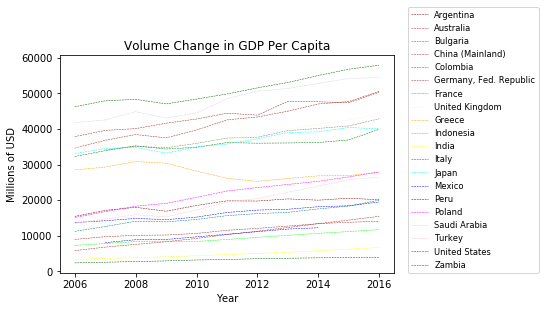

In [30]:
#and ploterate
columns = []
colors = []
colors = []
for column in country_gdp:
        x_axis = country_gdp.index
        y_axis = country_gdp[column]
        columns.append(column)
        if column == 'Argentina':
            colors='maroon'
        if column == 'Australia':
            colors='brown'
        if column == 'China (Mainland)':
            colors='brown'
        if column =='Bulgaria':
            colors='teal'
        if column=='Columbia':
            colors='navy'
        if column=='France':
            colors='grey'
        if columns=='Germany, Fed. Republic':
            colors='red'
        if column == 'Greece':
            colors='orange'
        if column == 'India':
            colors='yellow'
        if column == 'Indonesia':
            colors='lime'
        if column =='Italy':
            colors='green'
        if column=='Japan':
            colors='cyan'
        if column=='Mexico':
            colors='blue'
        if columns=='Peru':
            colors='purple'
        if column == 'Poland':
            colors='magenta'
        if column == 'Saudi Arabia':
            colors='lightgrey'
        if column =='Turkey':
            colors='pink'
        if column=='United Kingdom':
            colors='beige'
        if column=='United States':
            colors='darkgreen'
        if columns=='Zambia':
            colors='lavender'
        if column == 'Argentina':
            colors='maroon'
        if column == 'Australia':
            colors='brown'
        if column == 'China (Mainland)':
            colors='brown'
        if column =='Bulgaria':
            colors='teal'
        if column=='Columbia':
            colors='navy'
        if column=='France':
            colors='grey'
        if columns=='Germany, Fed. Republic':
            colors='red'
        if column == 'Greece':
            colors='orange'
        if column == 'India':
            colors='yellow'
        if column == 'Indonesia':
            colors='lime'
        if column =='Italy':
            colors='green'
        if column=='Japan':
            colors='cyan'
        if column=='Mexico':
            colors='blue'
        if columns=='Peru':
            colors='purple'
        if column == 'Poland':
            colors='magenta'
        if column == 'Saudi Arabia':
            colors='lightgrey'
        if column =='Turkey':
            colors='pink'
        if column=='United Kingdom':
            colors='beige'
        if column=='United States':
            colors='darkgreen'
        if columns=='Zambia':
            colors='lavender'
        
        plt.errorbar(x_axis, y_axis, color=colors,linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Volume Change in GDP Per Capita")
plt.xlabel("Year")
plt.ylabel("Millions of USD")
plt.savefig("../Graph_Images/GDP Graphs/GDP PerCap Volume",bbox_inches="tight")

In [31]:
#calculate percentage change year to year
pct_gdp = country_gdp.pct_change(fill_method ='ffill') 
pct_gdp

LOCATION,Argentina,Australia,Bulgaria,China (Mainland),Colombia,"Germany, Fed. Republic",France,United Kingdom,Greece,Indonesia,India,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United States,Zambia
TIME,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,0.108409,0.046320,0.120681,0.166954,0.084176,0.063399,NaN,0.023781,0.027183,0.075667,0.099306,0.051045,0.042691,0.037341,NaN,0.108662,0.017906,0.089757,0.036149,0.082220
2008,0.050404,0.012553,0.117612,0.112207,0.040241,0.043788,0.029623,0.029515,0.053473,0.064576,0.039371,0.040442,0.008592,0.045870,0.099936,0.090917,0.054428,0.080427,0.008542,0.069064
2009,-0.061178,0.037922,-0.011687,0.096986,0.007806,-0.024233,-0.010921,-0.043970,-0.015154,0.017671,0.068284,-0.026049,-0.046020,-0.023748,0.007302,0.042588,-0.039803,-0.035417,-0.026558,0.069568
2010,0.096211,0.028163,0.048371,0.113903,0.043323,0.058730,0.035039,0.038045,-0.073021,-0.012755,0.077213,0.014606,0.053984,0.049908,0.083675,0.089536,0.033026,0.123632,0.029081,0.084743
2011,0.069776,0.038141,0.072788,0.113048,0.083317,0.071479,0.042072,0.021296,-0.072003,0.068325,0.072040,0.038042,0.022315,0.084480,0.073251,0.085145,0.090641,0.127608,0.029236,0.046432
2012,-0.002686,-0.012160,0.037061,0.093851,0.046745,0.019229,0.006309,0.031305,-0.032772,0.065513,0.061735,-0.004986,0.040212,0.040699,0.069614,0.042781,0.042997,0.052882,0.034737,0.063888
2013,0.030428,0.088471,0.020945,0.091215,0.051842,0.037688,0.048940,0.043746,0.032170,0.059451,0.068686,0.001800,0.048222,0.014038,0.065334,0.037412,0.015068,0.084569,0.029200,0.035010
2014,-0.017544,-0.002567,0.058723,0.087620,0.054990,0.044842,0.015573,0.032124,0.028385,0.055733,0.080602,0.003527,0.004489,0.040415,0.031833,0.035835,0.027575,0.080061,0.036708,0.033657


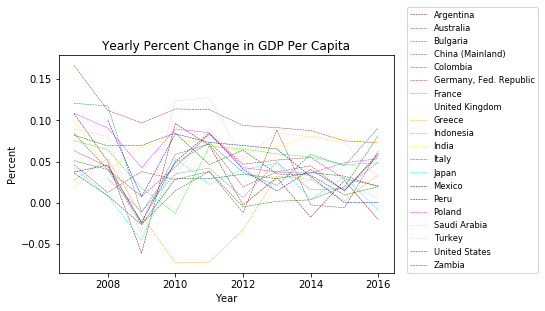

In [32]:
#and ploterate
columns = []
colors = []
for column in pct_gdp:
        x_axis = pct_gdp.index
        y_axis = pct_gdp[column]
        columns.append(column)
        if column == 'Argentina':
            colors='maroon'
        if column == 'Australia':
            colors='brown'
        if column == 'China (Mainland)':
            colors='brown'
        if column =='Bulgaria':
            colors='teal'
        if column=='Columbia':
            colors='navy'
        if column=='France':
            colors='grey'
        if columns=='Germany, Fed. Republic':
            colors='red'
        if column == 'Greece':
            colors='orange'
        if column == 'India':
            colors='yellow'
        if column == 'Indonesia':
            colors='lime'
        if column =='Italy':
            colors='green'
        if column=='Japan':
            colors='cyan'
        if column=='Mexico':
            colors='blue'
        if columns=='Peru':
            colors='purple'
        if column == 'Poland':
            colors='magenta'
        if column == 'Saudi Arabia':
            colors='lightgrey'
        if column =='Turkey':
            colors='pink'
        if column=='United Kingdom':
            colors='beige'
        if column=='United States':
            colors='darkgreen'
        if columns=='Zambia':
            colors='lavender'
        
        plt.errorbar(x_axis, y_axis, color=colors,linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Yearly Percent Change in GDP Per Capita")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.savefig("../Graph_Images/GDP Graphs/GDP PerCap Percent Changes",bbox_inches="tight")